<a href="https://colab.research.google.com/github/chouat2207/Python/blob/main/1_2_ML_Multiple_linear_regression_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

In [ ]:
df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.000,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.000,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.000,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.000,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.000,...,-2,143,116,116,0,1,8.7,very bad,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,13,10,13,10,12,11,0.0,96,7.375,...,8,119,143,116,0,1,8.7,not good not bad,12,27
361,2019-12-28,11,5,12,7,8,8,0.0,93,7.625,...,4,143,116,116,0,1,6.9,very bad,12,28
362,2019-12-29,9,2,11,3,6,7,0.0,86,10.000,...,0,116,116,116,0,1,8.7,very bad,12,29
363,2019-12-30,12,4,7,5,9,9,0.0,61,10.000,...,4,113,113,113,0,1,8.7,very bad,12,30


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
# Complete x, y and z in the script below:
px.scatter_3d(x = df_weather['MAX_TEMPERATURE_C'],
              y = df_weather['MIN_TEMPERATURE_C'],
              z= df_weather['SUNHOUR'] ,
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [ ]:

# Your code here :
from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

model = LinearRegression()
model.fit(X, y)

df_weather['predict'] = model.predict(X)

# Affichage des premiers résultats de la prédiction
df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR', 'predict']].head()


,MIN_TEMPERATURE_C,SUNHOUR,predict
0,4,5.1,8.980922
1,5,8.7,12.353602
2,0,8.7,7.410233
3,-1,5.1,4.037552
4,-1,8.7,6.421559


In [ ]:
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",model.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", model.intercept_)

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [ ]:
# Your code here :
fig2 = px.scatter_3d(df_weather,
                     x='predict',
                     y='MIN_TEMPERATURE_C',
                     z='SUNHOUR'
                  )
fig2.show()


**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

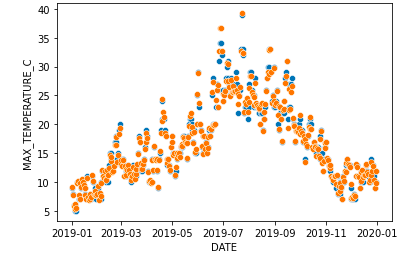

In [ ]:
# Your code here :

# Sélectionner uniquement les variables numériques
numeric_columns = df_weather.select_dtypes(include=[np.number]).columns.tolist()

# Retirer la colonne cible 'MAX_TEMPERATURE_C' des variables explicatives
numeric_columns.remove('MAX_TEMPERATURE_C')

X2 = df_weather[numeric_columns]
y2 = df_weather['MAX_TEMPERATURE_C']

model2 = LinearRegression()
model2.fit(X2, y2)

df_weather['predict2'] = model2.predict(X2)

# Affichage des premières prédictions
df_weather[['DATE', 'MAX_TEMPERATURE_C', 'predict2']].head()


,DATE,MAX_TEMPERATURE_C,predict2
0,2019-01-01,9,9.083825
1,2019-01-02,8,7.723627
2,2019-01-03,6,5.875397
3,2019-01-04,5,5.345425
4,2019-01-05,6,6.098643


You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

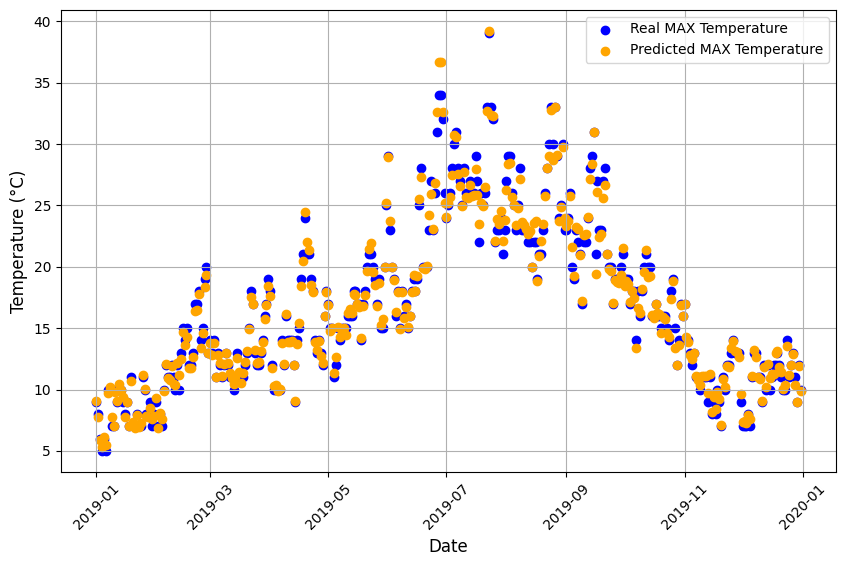

In [ ]:
# Your code here :
# Affichage d'un graphique de dispersion pour comparer les vraies températures et les prédictions
plt.figure(figsize=(10, 6))
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue', label='Real MAX Temperature')
plt.scatter(df_weather['DATE'], df_weather['predict2'], color='orange', label='Predicted MAX Temperature')

plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

plt.legend()

# Afficher le graphique
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
